# Simple Classification

In [1]:
import tensorflow as tf

In [2]:
tf.test.is_built_with_cuda()

False

## Data Exploration

In [3]:
from sklearn.datasets import load_breast_cancer

In [4]:
data = load_breast_cancer()

In [6]:
type(data)

sklearn.utils._bunch.Bunch

In [7]:
data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [11]:
data.data.shape

(569, 30)

In [13]:
data.target.shape

(569,)

In [14]:
data.target_names

array(['malignant', 'benign'], dtype='<U9')

In [15]:
data.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

### Train-Test Split

In [16]:
from sklearn.model_selection import train_test_split

In [18]:
x_train, x_test, y_train, y_test = train_test_split(data.data, data.target, test_size=0.3)

In [19]:
x_train.shape, x_test.shape

((398, 30), (171, 30))

### Scaling

In [20]:
from sklearn.preprocessing import StandardScaler

In [21]:
scaler = StandardScaler()

In [22]:
x_train = scaler.fit_transform(x_train)

In [23]:
x_test = scaler.transform(x_test)

## Model Building

In [30]:
from keras import Sequential
from keras.layers import Dense, Input
from keras.optimizers import Adam

In [29]:
model = Sequential()
model.add(Input(shape=x_train.shape[1:]))
model.add(Dense(1, activation="sigmoid"))

In [37]:
model.compile(optimizer=Adam(), loss="binary_crossentropy", metrics=["accuracy"])

In [38]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 1)                   │              31 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 31 (124.00 B)

 Trainable params: 31 (124.00 B)

 Non-trainable params: 0 (0.00 B)

In [40]:
history = model.fit(x_train, y_train, validation_data=(x_test, y_test), batch_size=32, epochs=100)

Epoch 1/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.1680 - loss: 1.5484 - val_accuracy: 0.1930 - val_loss: 1.2783
Epoch 2/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.1990 - loss: 1.3413 - val_accuracy: 0.2281 - val_loss: 1.1453
Epoch 3/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.2184 - loss: 1.2445 - val_accuracy: 0.3216 - val_loss: 1.0260
Epoch 4/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2679 - loss: 1.0927 - val_accuracy: 0.3743 - val_loss: 0.9188
Epoch 5/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3165 - loss: 0.9954 - val_accuracy: 0.4444 - val_loss: 0.8273
Epoch 6/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3489 - loss: 0.9282 - val_accuracy: 0.5205 - val_loss: 0.7483
Epoch 7/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4419 - loss: 0.8629 - val_accuracy: 0.5965 - val_loss: 0.6792
Epoch 8/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4898 - loss: 0.7694 - val_accuracy: 0.6901 - v

In [46]:
print("Training Score:", model.evaluate(x_train, y_train))
print("Test Score:", model.evaluate(x_test, y_test))

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9736 - loss: 0.1040 
Training Score: [0.1203240305185318, 0.9673366546630859]
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9564 - loss: 0.1090 
Test Score: [0.11499413847923279, 0.9532163739204407]


## Results

In [43]:
import matplotlib.pyplot as plt

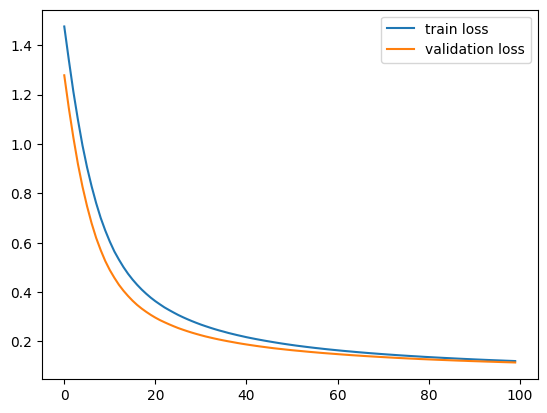

In [48]:
plt.plot(history.history["loss"], label="train loss")
plt.plot(history.history["val_loss"], label="validation loss")
plt.legend()

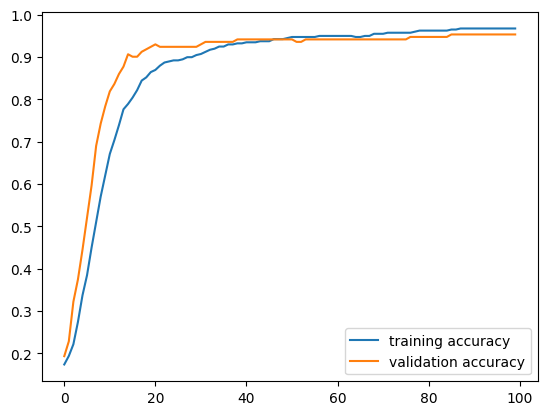

In [49]:
plt.plot(history.history["accuracy"], label="training accuracy")
plt.plot(history.history["val_accuracy"], label="validation accuracy")
plt.legend()